# Magic Carpet

In [24]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

## 1st Test


### Collisions

In [4]:
collisions_df = pd.read_csv("./1stTest/collisions/collisionOverview.csv")
collisions_df.head()

,user,technique,collisionCount,timeColliding
0,andreMinion,ElevatorGaze,2,4.931101
1,danielLopes,ElevatorGaze,2,5.830975
2,danielMendes,ElevatorGaze,2,6.124748
3,diogo,ElevatorGaze,2,7.37631
4,elderGajoAleatorio,ElevatorGaze,2,4.919388


In [11]:
collisions_df['technique'].value_counts()


ElevatorGaze    18
GazeOriented    18
HandSteering    18
Name: technique, dtype: int64

#### Summary Statistics

In [9]:
# Convert 'timeColliding' to numeric type
collisions_df['timeColliding'] = pd.to_numeric(collisions_df['timeColliding'], errors='coerce')

# Summary statistics for collisionCount and timeColliding
summary_stats = collisions_df[['collisionCount', 'timeColliding']].describe()
summary_stats

,collisionCount,timeColliding
count,54.000000,53.000000
mean,2.018519,5.399741
std,0.237180,1.213620
min,1.000000,1.991535
25%,2.000000,4.931101
50%,2.000000,5.376392
75%,2.000000,6.196342
max,3.000000,7.726841


Most users experienced around 2 collisions with a mean time of 5.40 seconds spent colliding.

#### Comparison Between Techniques

In [10]:
# Calculate mean collisionCount and timeColliding for each technique
technique_comparison = collisions_df.groupby('technique').agg({
    'collisionCount': 'mean',
    'timeColliding': 'mean'
}).reset_index()

technique_comparison

,technique,collisionCount,timeColliding
0,ElevatorGaze,2.000000,6.179827
1,GazeOriented,2.000000,5.650001
2,HandSteering,2.055556,4.383300


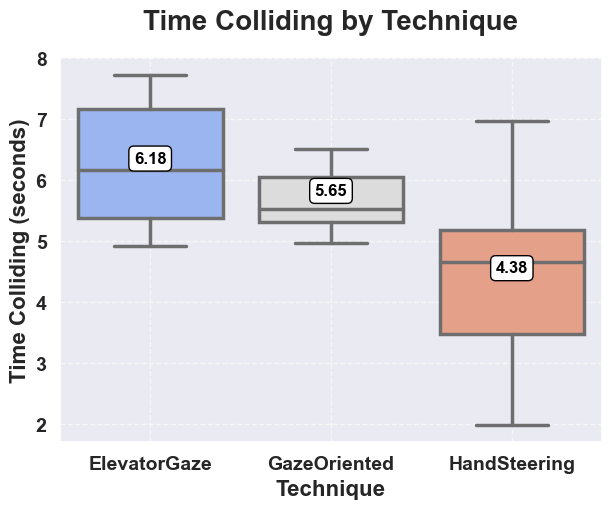

In [29]:
# Further enhancing the boxplot for a more professional look
plt.figure(figsize=(7, 5))
sns.boxplot(x='technique', y='timeColliding', data=collisions_df, palette='coolwarm', linewidth=2.5)

# Adding enhancements for a professional look
plt.title('Time Colliding by Technique', fontsize=20, weight='bold', pad=20)
plt.xlabel('Technique', fontsize=16, weight='bold')
plt.ylabel('Time Colliding (seconds)', fontsize=16, weight='bold')
plt.xticks(fontsize=14, weight='bold')
plt.yticks(fontsize=14, weight='bold')
plt.grid(True, linestyle='--', alpha=0.6)

# Adding mean markers with improved styling
mean_values = collisions_df.groupby('technique')['timeColliding'].mean().values
for i, mean in enumerate(mean_values):
    plt.text(i, mean + 0.1, f'{mean:.2f}', ha='center', color='black', weight='bold', fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

plt.show()


- All techniques have a similar mean collisionCount of around 2.
- HandSteering has the lowest mean timeColliding (4.38 seconds), indicating it might be more efficient in avoiding prolonged collisions.
- ElevatorGaze has the highest mean timeColliding (6.18 seconds)

HandSteering appears to be the most efficient technique in terms of reducing time spent in collisions. 
With HandSteering you have more awareness

#### Correlation

In [12]:
# Calculate the correlation between collisionCount and timeColliding
correlation = collisions_df[['collisionCount', 'timeColliding']].corr()
correlation


,collisionCount,timeColliding
collisionCount,1.000000,0.112889
timeColliding,0.112889,1.000000


There is a weak correlation between collision count and time spent colliding, indicating that the two measures may not be strongly related.

### Collisions Comparison 